In [29]:

from pandas import Series
from pandas import DataFrame
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
file = pd.read_excel("GooglePlaystore.xlsx")


#3.1
#Searched Reviews collumn for 3.0M entry and dropped it via its index

In [30]:
file = pd.read_excel("GooglePlaystore.xlsx")

for i in file.index:
    if file.loc[i, "Reviews"] == "3.0M":
        file = file.drop(i)


    

#3.2 Searched every collumn for Varies with device entry and drops it using index
#traverses every entry of every collumn

In [31]:
y = 0

for y in file.columns:
    
    for i in file.index:
        if file.loc[i, y] == "Varies with device":
            file = file.drop(i)
            



#3.3 Check every index on Android Ver collumn
#Splits string by space which should cover all inpuit cases of "x.x.x or x.x - x.x"
#splits first split by "." for new input

In [32]:
for i in file.index:
    worker = file.loc[i, "Android Ver"]
    
    try:
        worker = worker.split(" ")
        msg = worker[0].split(".")
        string = ""
        string += msg[0]
        string += "."
        string += msg[1]
        file.loc[i, "Android Ver"] = string
    except:
        zed = 15






#3.4 traverses every entry of Installs collumn
#regex substitute removes every non digit character then appends that back to file

In [33]:
for i in file.index:
    worker = file.loc[i, "Installs"]
    #print(worker)
    worker = re.sub("[^0-9]", "", worker)
    #print(worker)
    #print("\n")
    file.loc[i, "Installs"] = worker

# for i in file.index:
#     worker = file.loc[i, "Installs"]

#     try:
#         num = int(worker)
#         print(num)
#     except:
#         print(worker)

#3.5 uses np.isnan to match missing ratings entry
#removes index if they dont match parameters else fills in missing value using mean of ratings of that category

In [34]:
for i in file.index:
    worker = file.loc[i, "Rating"]
    

    if np.isnan(worker):
        
        cat = file.loc[i, "Category"]
        numRev = file.loc[i,"Reviews"]
        numInst = int(file.loc[i,"Installs"])

        if numRev < 100 and numInst < 50000:
            file = file.drop(i)
        else: 
            zed = file[file["Category"]  == cat]

            num = zed["Rating"].mean()
            num = np.round(num, 2)
            file.loc[i, "Rating"] = num

        

#3.6 traverses size collumn
#converts entries to integer value

In [42]:
for i in file.index:
    worker = file.loc[i, "Size"]

    if "k" in worker or "K" in worker:
        if "." in worker:
            #print(worker)
            worker = worker.replace(".","")
            worker = worker.replace("k","")
            worker += "00"
            #print(worker)
            file.loc[i,"Size"] = worker
        else:
            #print(worker)
            worker = worker.replace("k","")
            worker += "000"
            #print(worker)
            file.loc[i, "Size"] = worker

    elif "M" in worker or "m" in worker:
        if "." in worker:
            #print(worker)
            worker = worker.replace(".","")
            worker = worker.replace("M","")
            worker += "00000"
            #print(worker)
            file.loc[i, "Size"] = worker
        else:
            #print(worker)
            worker = worker.replace("M", "")
            worker += "000000"
            #print(worker)
            file.loc[i,"Size"] = worker

#3.2.1 prints describe of every category

In [36]:
catList = []
for i in file.index:
    worker = file.loc[i, "Category"]
    if worker not in catList:
        catList.append(worker)

for entry in catList:
    worker = file[file["Category"]  == entry]

    desc = worker["Rating"].describe()
    print(entry)
    print(desc)
    print("\n")



ART_AND_DESIGN
count    59.000000
mean      4.358644
std       0.365322
min       3.200000
25%       4.100000
50%       4.400000
75%       4.700000
max       5.000000
Name: Rating, dtype: float64


AUTO_AND_VEHICLES
count    62.000000
mean      4.146774
std       0.569935
min       2.100000
25%       3.900000
50%       4.250000
75%       4.500000
max       4.900000
Name: Rating, dtype: float64


BEAUTY
count    40.000000
mean      4.291750
std       0.356175
min       3.100000
25%       4.075000
50%       4.300000
75%       4.525000
max       4.900000
Name: Rating, dtype: float64


BOOKS_AND_REFERENCE
count    147.000000
mean       4.320136
std        0.453084
min        2.700000
25%        4.100000
50%        4.400000
75%        4.600000
max        5.000000
Name: Rating, dtype: float64


BUSINESS
count    246.000000
mean       4.119187
std        0.662586
min        1.000000
25%        3.825000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64




#3.2.1 selects all "Free" apps from file, constructs dataframe ansDF to print top3 of every category

In [37]:
def freeAppAnalysis(string):
    zed = file[file["Type"] == "Free"]
    catList = []

    for entry in zed["Category"]:
        if entry not in catList:
            catList.append(entry)
    #print(catList)
    colString = "Top3 "
    colString += string
    ansDf = pd.DataFrame(columns = ['Category', 'App', colString])

    entryList = []
    AnsName = []
    AnsNum = []
    for entry in catList:
        worker = zed[zed["Category"] == entry]
    
        top= worker['Rating'].astype(float).nlargest(n=3)
    
        for item in top.index:
            AnsName.append(worker.loc[item, "App"])
        for item in top:
            AnsNum.append(item)

    
        for i in range(0,3):
            entryList.append(entry)
    
    ansDf["Category"] = entryList
    ansDf["App"] = AnsName
    ansDf[colString] = AnsNum
    
    return ansDf

freeAppAnalysis("Reviews")
    

    



,Category,App,Top3 Reviews
0,ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0
1,ART_AND_DESIGN,Harley Quinn wallpapers HD,4.8
2,ART_AND_DESIGN,Cardi B Wallpaper,4.8
3,AUTO_AND_VEHICLES,Tickets SDA 2018 and Exam from the State Traff...,4.9
4,AUTO_AND_VEHICLES,CDL Practice Test 2018 Edition,4.9
...,...,...,...
94,NEWS_AND_MAGAZINES,BI News,5.0
95,NEWS_AND_MAGAZINES,"Startupticker.ch News, Events",5.0
96,MAPS_AND_NAVIGATION,Tour BD (Bahir Dar Map),4.9
97,MAPS_AND_NAVIGATION,GPS Speedometer and Odometer,4.8


#3.2.3 Selects all paid apps
#Find average max in minimum price of the paid applications

In [38]:
ted = file[file["Type"] == "Paid"]
num = ted["Price"].mean()
maxAns = ted["Price"].max()
minAns = ted["Price"].min()



print("Average is: "  + str(num))
print("Max is: "  + str(maxAns))
print("Min is: "  + str(minAns))





Average is: 15.139163763066062
Max is: 400.0
Min is: 0.99


#3.3.1 Constructs pie graph of amount of apps for every genre
#Populate dictionary with entry from every genre, if multiple entry on single line; splits by ";" delimiter
#Constructs pie graph from entries of dictionary
#prints dictionary and graph, instructions super vague on graph construction hope values are correct 

{'Art & Design': 62, 'Pretend Play': 85, 'Creativity': 31, 'Action & Adventure': 116, 'Auto & Vehicles': 62, 'Beauty': 40, 'Books & Reference': 149, 'Business': 246, 'Comics': 49, 'Communication': 210, 'Dating': 174, 'Education': 585, 'Brain Games': 61, 'Entertainment': 474, 'Music & Video': 31, 'Events': 36, 'Finance': 263, 'Food & Drink': 86, 'Health & Fitness': 222, 'House & Home': 58, 'Libraries & Demo': 68, 'Lifestyle': 280, 'Adventure': 82, 'Arcade': 196, 'Casual': 229, 'Card': 41, 'Strategy': 99, 'Action': 330, 'Puzzle': 133, 'Sports': 264, 'Word': 24, 'Racing': 95, 'Simulation': 197, 'Board': 55, 'Trivia': 28, 'Role Playing': 114, 'Educational': 97, 'Music': 18, 'Music & Audio': 1, 'Video Players & Editors': 116, 'Medical': 321, 'Social': 170, 'Shopping': 178, 'Photography': 234, 'Travel & Local': 155, 'Tools': 633, 'Personalization': 277, 'Productivity': 232, 'Parenting': 48, 'Weather': 49, 'News & Magazines': 171, 'Maps & Navigation': 94, 'Casino': 31}


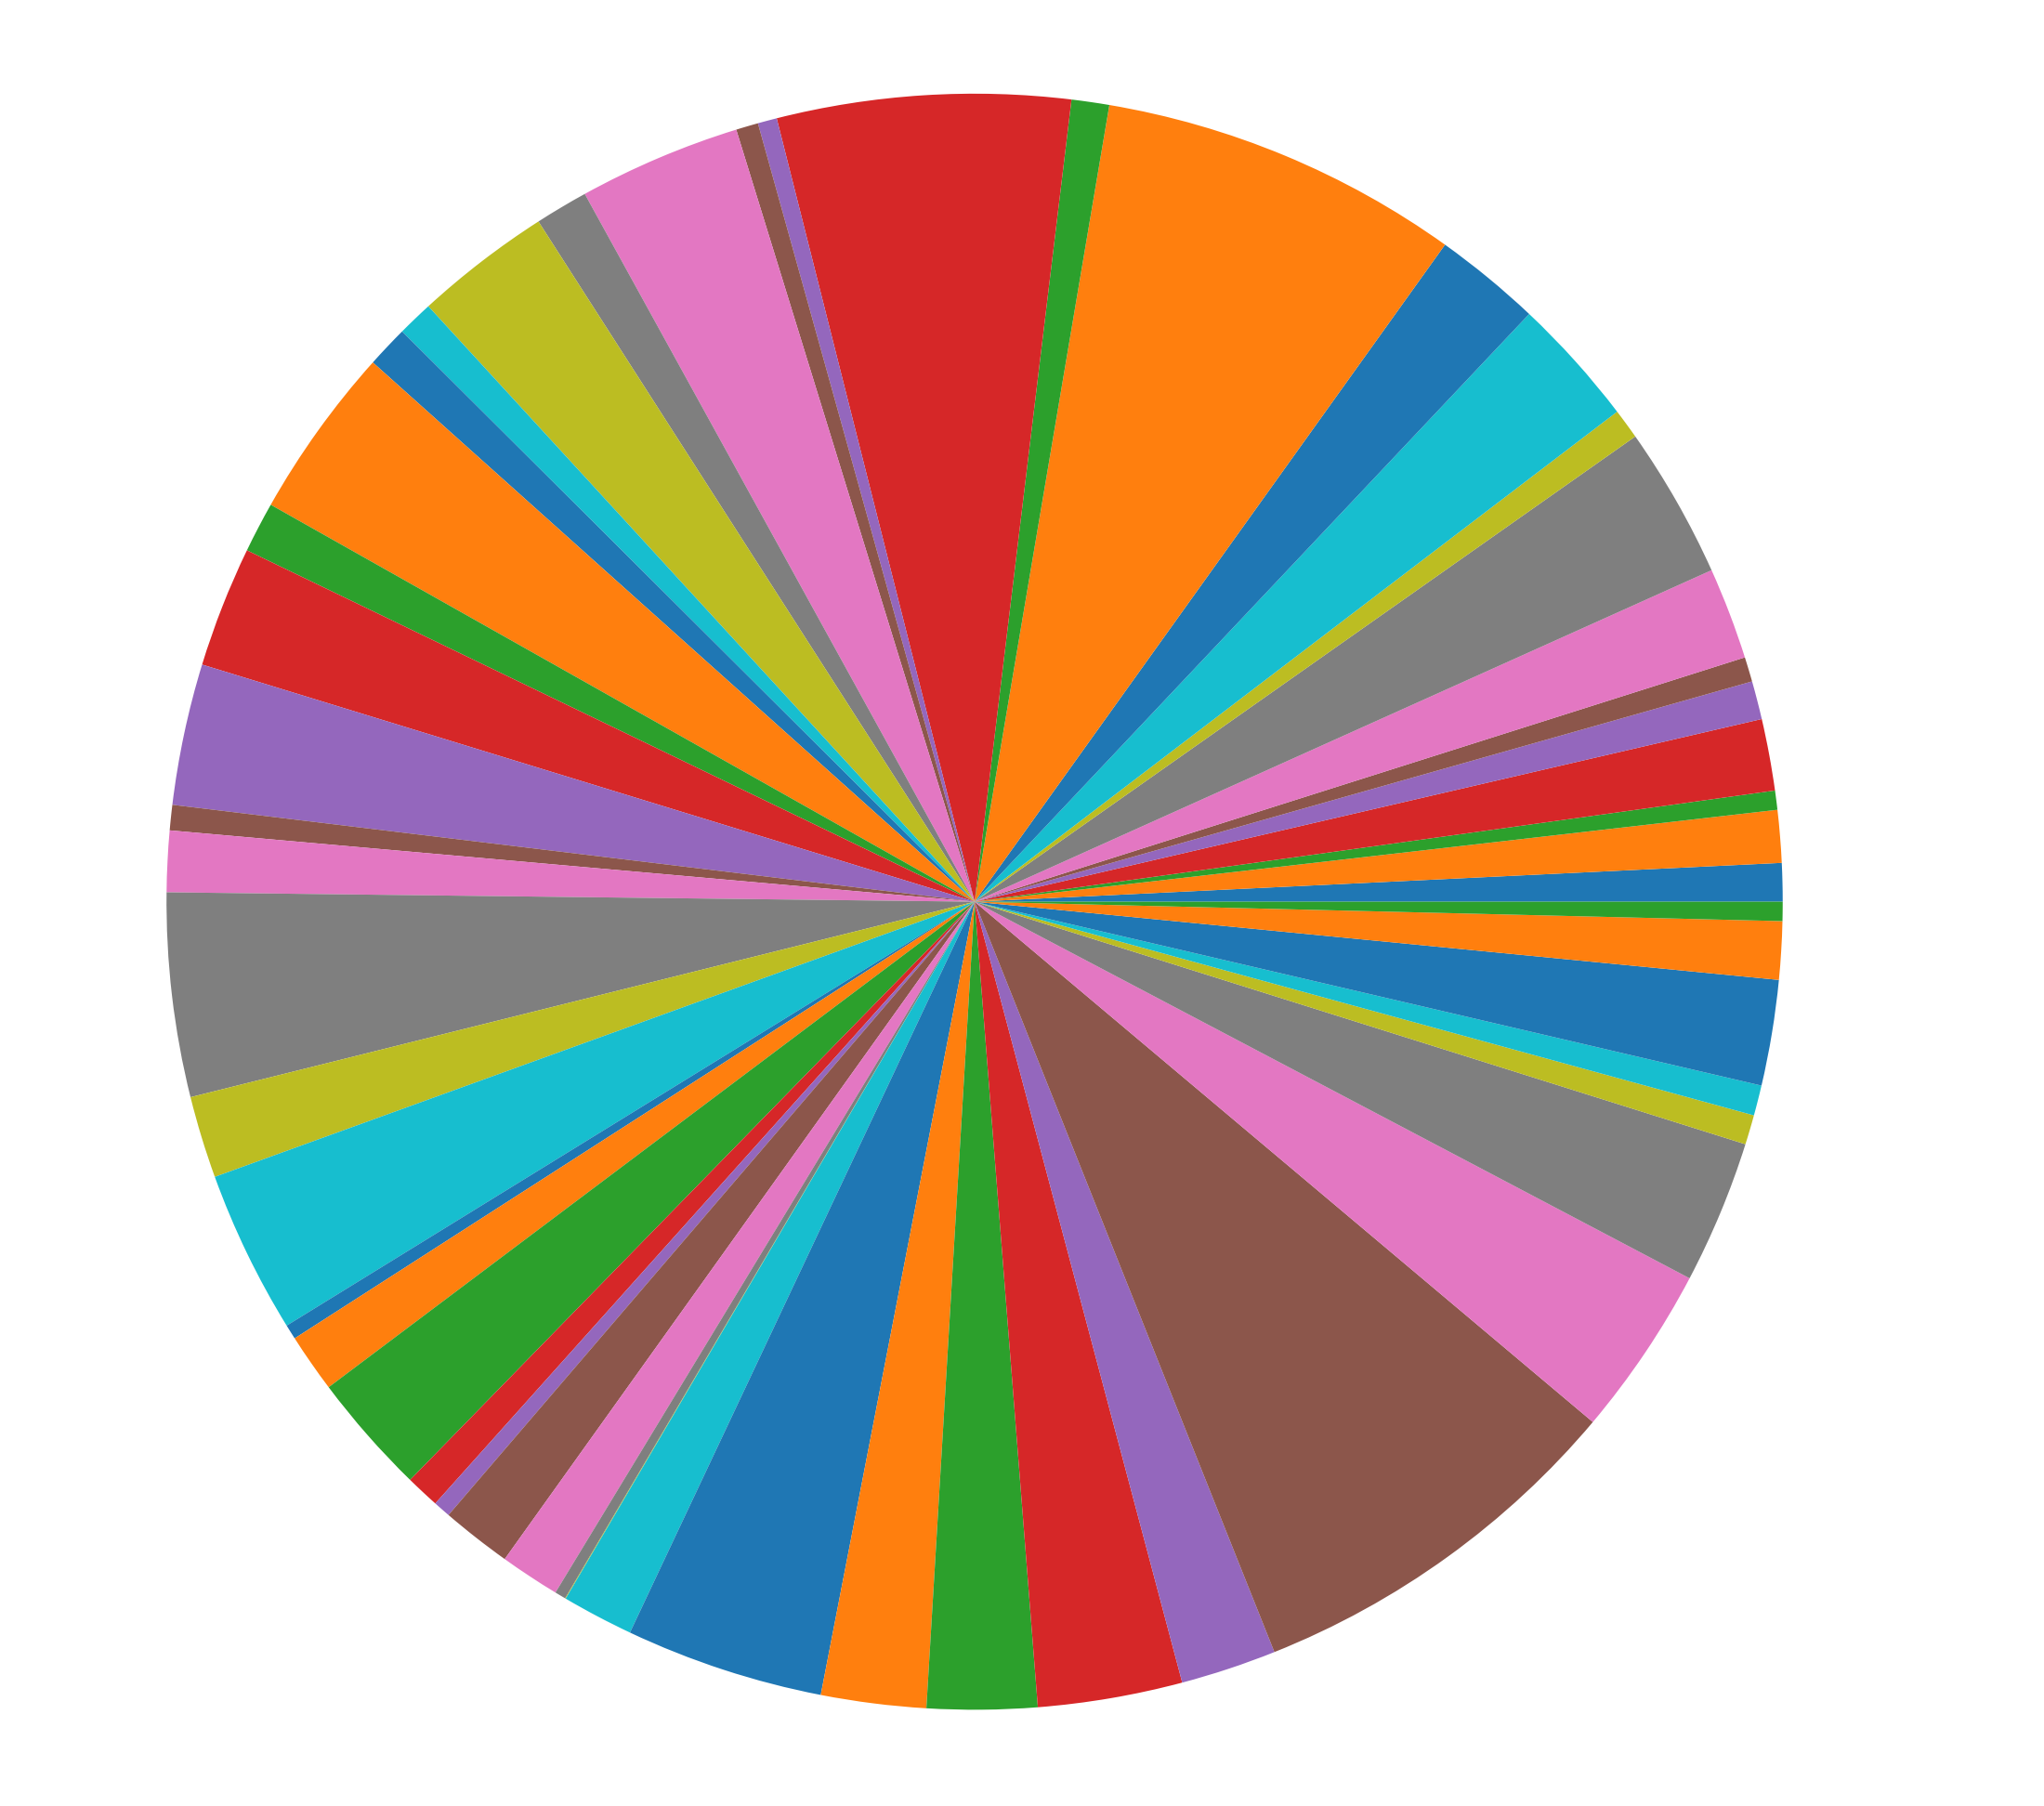

In [39]:
dict = {}
for i in file.index:
    worker = file.loc[i, "Genres"]
    meg = worker.split(";")
    for entry in meg:
        if entry not in dict:
            dict[entry] = 1
        else:
            dict[entry] += 1

labels = list(dict.keys())
values = list(dict.values())
print(dict)
plt.pie(values, labels=labels, radius = 10.0, textprops={'fontsize': 20, 'color':"w"})
plt.show()


#Constructs box plot from ratings of business and education categories
#instructions on graph construction was vague, hope its right

Ratings List for Business is: [4.3, 4.3, 3.9, 4.8, 4.5, 4.4, 4.0, 4.3, 4.2, 4.6, 3.1, 3.9, 4.1, 4.4, 4.5, 4.4, 4.4, 4.3, 4.4, 4.6, 4.4, 4.7, 3.8, 4.12, 4.7, 4.5, 4.2, 4.7, 4.8, 4.2, 4.3, 4.1, 3.8, 4.3, 3.8, 4.1, 4.6, 4.3, 4.5, 4.1, 4.5, 4.6, 4.2, 4.4, 4.4, 4.0, 4.2, 4.1, 3.8, 3.9, 4.2, 4.3, 4.1, 3.8, 4.3, 3.8, 4.1, 4.6, 4.3, 4.5, 4.1, 4.5, 4.6, 4.2, 4.7, 4.5, 4.2, 4.7, 4.8, 4.3, 4.5, 4.3, 3.4, 3.8, 4.2, 4.5, 4.4, 3.1, 4.3, 4.8, 1.7, 4.1, 4.3, 4.1, 4.7, 5.0, 3.9, 3.7, 4.4, 4.1, 4.4, 5.0, 4.1, 3.1, 4.7, 3.7, 4.4, 2.1, 3.4, 4.2, 4.2, 4.4, 3.9, 4.5, 3.6, 4.9, 5.0, 4.0, 4.0, 4.7, 5.0, 5.0, 4.9, 3.0, 3.4, 4.5, 3.4, 4.5, 4.8, 4.7, 4.6, 4.8, 2.9, 4.3, 4.1, 4.6, 4.7, 4.7, 4.8, 3.4, 2.4, 3.2, 3.1, 4.3, 4.2, 4.5, 4.4, 5.0, 5.0, 2.7, 4.2, 4.4, 4.3, 4.4, 4.6, 4.3, 5.0, 5.0, 1.0, 3.5, 4.0, 4.5, 4.6, 3.7, 4.4, 4.6, 4.4, 4.5, 3.7, 4.1, 4.1, 4.4, 4.2, 4.4, 4.4, 3.8, 4.2, 4.4, 4.5, 4.3, 3.4, 4.4, 4.3, 3.6, 4.6, 4.0, 3.0, 4.4, 3.9, 4.4, 4.6, 4.2, 5.0, 4.3, 3.6, 3.7, 4.4, 2.3, 4.0, 4.0, 3.4, 3.0, 4.0, 3.4

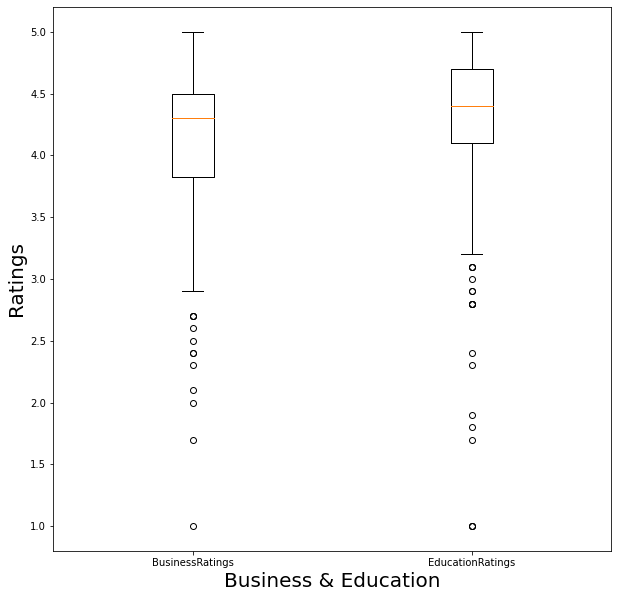

In [40]:
busDF = file[file["Genres"] == "Business"]
eduDF = file[file["Genres"] == "Education"]

busRatList = []
eduRatList = []

for i in busDF.index:
    worker = busDF.loc[i, "Rating"]
    busRatList.append(worker.astype(float))

for i in eduDF.index:
    worker = eduDF.loc[i, "Rating"]
    eduRatList.append(worker.astype(float))
#print(busDF)
#print(eduDF)
print("Ratings List for Business is: "+str(busRatList))
print("\n")
print("Ratings List for Education is: "+str(eduRatList))
#print(len(busRatList))
#print(len(eduRatList))

plt.figure(figsize=(10, 10))
plt.boxplot([busRatList, eduRatList],labels=('BusinessRatings','EducationRatings'))
plt.xlabel("Business & Education", fontsize=20, )
plt.ylabel('Ratings', fontsize=20)
plt.show()





